1- Basics 

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Reading images and Videos

In [2]:
# read images

one = cv.imread("Images/1.jpg")   # reading the image
# cv.imshow('One',one)              # displaying the image in a new window

In [ ]:
# reading Videos

#capture1 = cv.VideoCapture(0)   # capture a video using the laptops camera refrenced usually by 0
capture = cv.VideoCapture("Videos/Imprimer de la peau en 3D - Le Magazine de la sant - 480P.mp4")  # importe une video

while True :
    isTrue, frame = capture.read()
    cv.imshow('vid', frame)
    if cv.waitKey(20) & 0xFF == ord('d'):
        break 

capture.release()
cv.destroyAllWindows()

In [4]:
cv.waitKey(1) # the program will stop until the '1' key is pressed

-1

2 - Resinzing and rescaling

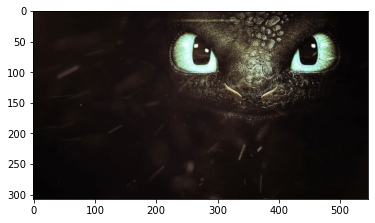

In [4]:
h= int(one.shape[0]* 0.75)
w= int(one.shape[1]* 0.75)
dim = (w,h)
onee = cv.resize(one, dim, interpolation= cv.INTER_AREA)
plt.imshow(onee)

# print(dim)

3 - Drawing shapes and putting text

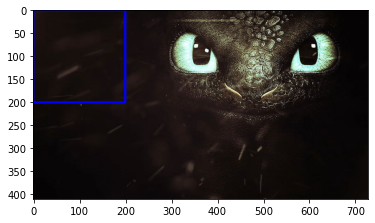

In [5]:
# Drawing shapes

blank= np.zeros((250, 250, 0,), dtype= "uint8")   # type de pixel

onerect = cv.rectangle(one, (0,0), (200,200), (0,0,250), thickness=3)
plt.imshow(onerect)

# cv.circle(), cv.line()


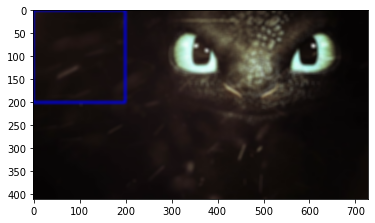

In [11]:
# Putting text 
#cv.putText()

#colorisation 
cv.cvtColor(one, cv.COLOR_RGB2GRAY)   # conversion en niveau de gris

blur = cv.GaussianBlur(one, (9,9), cv.BORDER_DEFAULT)  # pour flouter l'image

# quand on augmente la taille du kernel on augmente le degre de floutage

plt.imshow(blur)
plt.show()